In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
df = pd.read_excel('premiums_rest.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [161]:
df['Genetical_Risk']=0

In [162]:
df.shape

(29904, 14)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29904 entries, 0 to 29903
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    29904 non-null  int64 
 1   Gender                 29904 non-null  object
 2   Region                 29904 non-null  object
 3   Marital_status         29904 non-null  object
 4   Number Of Dependants   29904 non-null  int64 
 5   BMI_Category           29904 non-null  object
 6   Smoking_Status         29895 non-null  object
 7   Employment_Status      29903 non-null  object
 8   Income_Level           29895 non-null  object
 9   Income_Lakhs           29904 non-null  int64 
 10  Medical History        29904 non-null  object
 11  Insurance_Plan         29904 non-null  object
 12  Annual_Premium_Amount  29904 non-null  int64 
 13  Genetical_Risk         29904 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


## Handling NA values

In [164]:
df.isna().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           9
Employment_Status        1
Income_Level             9
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
Genetical_Risk           0
dtype: int64

In [165]:
df[df['Smoking_Status'].isna()]

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
115,26,Female,Southwest,Married,3,Underweight,NaN,Salaried,> 40L,69,Diabetes,Gold,22605,0
9313,47,Male,Southwest,Married,4,Normal,NaN,Freelancer,25L - 40L,32,Diabetes,Gold,26100,0
9728,45,Male,Northwest,Married,4,Overweight,NaN,Salaried,10L - 25L,16,High blood pressure & Heart disease,Silver,21881,0
10096,34,Male,Southwest,Married,5,Normal,NaN,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Gold,25865,0
10736,61,Female,Southwest,Married,2,Normal,NaN,Self-Employed,25L - 40L,27,Thyroid,Gold,32501,0
12122,50,Female,Northeast,Married,3,Underweight,NaN,Salaried,25L - 40L,25,High blood pressure,Gold,27317,0
13604,69,Male,Southeast,Married,2,Normal,NaN,Freelancer,<10L,9,Diabetes,Silver,23118,0
15223,54,Male,Southwest,Married,3,Overweight,NaN,Salaried,> 40L,54,High blood pressure & Heart disease,Silver,24907,0
16286,58,Female,Southwest,Married,3,Obesity,NaN,Self-Employed,25L - 40L,32,Diabetes,Gold,30112,0


In [166]:
#since the entries are very less we can drop these

In [167]:
df.dropna(inplace=True)
df.isna().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           0
Employment_Status        0
Income_Level             0
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
Genetical_Risk           0
dtype: int64

In [168]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [169]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

# Handling Outliers

## Numerical Columns

In [170]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [171]:
numeric_columns = df.select_dtypes(['int64','float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

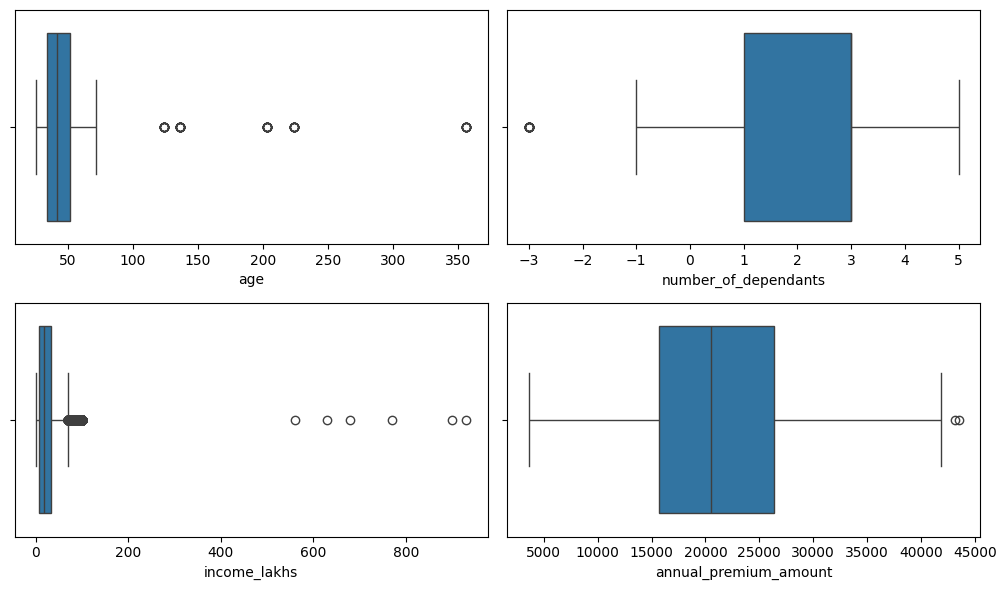

In [172]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Flatten axes to 1D
axes = axes.flatten()

# Loop through columns and axes
for ax, column in zip(axes, numeric_columns):
    sns.boxplot(x=df[column], ax=ax)

plt.tight_layout()
plt.show()

In [173]:
# 2 Columns having outliers 1.age 2.income_lakhs

### AGE

In [174]:
print(df[df.age>100]['age'].unique())
df[df.age>100]['age'].value_counts().sum()

[224 124 136 203 356]


np.int64(58)

In [175]:
df[df.age<=100].shape

(29828, 14)

In [176]:
df.shape[0]-58


29828

In [177]:
df1 = df[df['age']<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.0
mean,43.095380,2.381755,23.371530,20901.900563,0.0
std,11.041991,1.430735,24.751262,6928.457636,0.0
min,26.000000,-3.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15706.000000,0.0
50%,42.000000,3.000000,17.000000,20496.000000,0.0
75%,52.000000,3.000000,32.000000,26361.000000,0.0
max,72.000000,5.000000,930.000000,43471.000000,0.0


In [178]:
df.shape,df1.shape

((29886, 14), (29828, 14))

### number_of_dependants

In [179]:
## number of dependants are having -ve values fixing it

In [180]:
df1[df1['number_of_dependants']<0]['number_of_dependants'].unique()

array([-1, -3])

In [181]:
# only 2 enteries making it +ve

In [182]:
df1['number_of_dependants']=df1['number_of_dependants'].abs()

In [183]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.0
mean,43.095380,2.387790,23.371530,20901.900563,0.0
std,11.041991,1.420641,24.751262,6928.457636,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15706.000000,0.0
50%,42.000000,3.000000,17.000000,20496.000000,0.0
75%,52.000000,3.000000,32.000000,26361.000000,0.0
max,72.000000,5.000000,930.000000,43471.000000,0.0


### income_lakhs

In [184]:
df1.income_lakhs.describe()

count    29828.000000
mean        23.371530
std         24.751262
min          1.000000
25%          7.000000
50%         17.000000
75%         32.000000
max        930.000000
Name: income_lakhs, dtype: float64

In [185]:
def iqr_bounds(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return lower_bound,upper_bound

In [186]:
iqr_bounds(df1['income_lakhs'])

(-30.5, 69.5)

In [187]:
#lower_bound < min : no issues
#upper_bound < max : issues 
#generally values > upper_bound treated as outliers

In [188]:
df1.income_lakhs.quantile(0.98),df.income_lakhs.quantile(0.999)

(np.float64(92.0), np.float64(100.0))

In [189]:
# see 98% people earning < 91 lakhs
# 99% people earning < 1cr
#lets consider 100 (1cr) as our upper bound

In [190]:
income_threshold = df1.income_lakhs.quantile(0.999)
print(df1[df1.income_lakhs>income_threshold].shape)
df1[df1['income_lakhs']<=income_threshold]['income_lakhs'].describe()

(6, 14)


count    29822.000000
mean        23.226343
std         22.455408
min          1.000000
25%          7.000000
50%         17.000000
75%         32.000000
max        100.000000
Name: income_lakhs, dtype: float64

In [191]:
df2 = df1[df1.income_lakhs<=income_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.387734,23.226343,20900.689223,0.0
std,11.042430,1.420644,22.455408,6928.192115,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


### Analyzing distribution

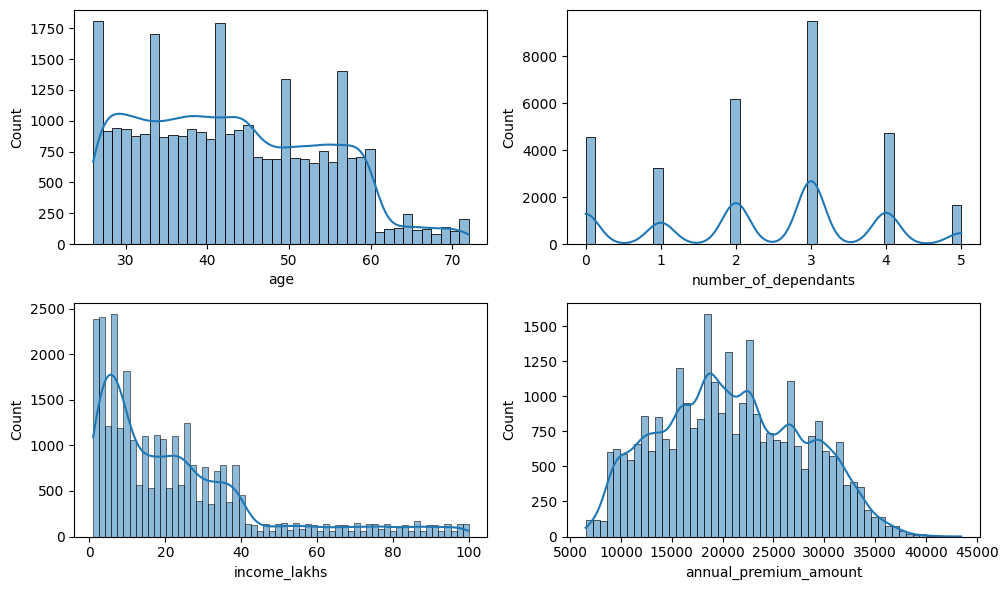

In [192]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Flatten axes to 1D
axes = axes.flatten()

# Loop through columns and axes
for ax, column in zip(axes, numeric_columns):
    sns.histplot(df2[column],kde=True, ax=ax)

plt.tight_layout()
plt.show()

### Bivariate Analysis

In [193]:
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

In [194]:
for i in numeric_columns:
    print(i)

age
number_of_dependants
income_lakhs
annual_premium_amount
genetical_risk


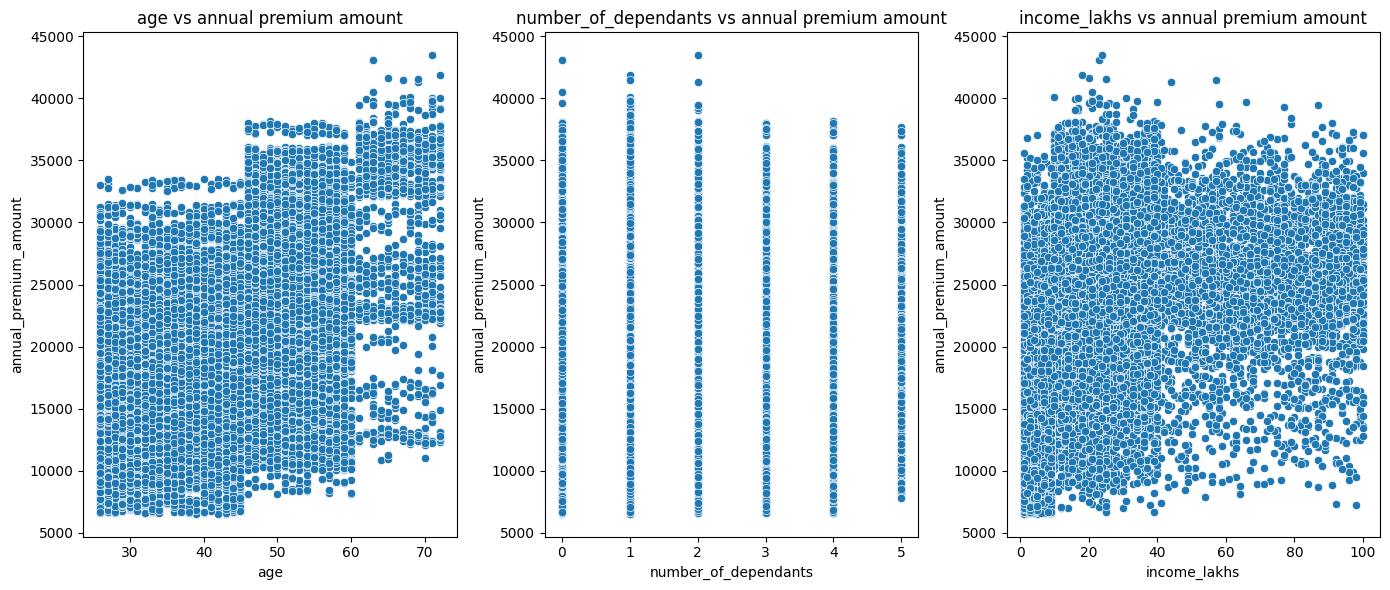

In [195]:
numeric_features = ['age', 'number_of_dependants', 'income_lakhs']
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Flatten axes to 1D
axes = axes.flatten()

# Loop through columns and axes
for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column],y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs annual premium amount')

plt.tight_layout()
plt.show()

## Categorical Columns

In [196]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [197]:
categorical_columns = ['gender', 'region', 'marital_status','bmi_category', 'smoking_status', 'employment_status', 'income_level','medical_history', 'insurance_plan']

In [198]:
for col in categorical_columns:
    print(f'{col} : ',df2[col].unique())

gender :  ['Male' 'Female']
region :  ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status :  ['Unmarried' 'Married']
bmi_category :  ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status :  ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status :  ['Salaried' 'Self-Employed' 'Freelancer']
income_level :  ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history :  ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan :  ['Bronze' 'Silver' 'Gold']


In [199]:
df2['smoking_status'].replace({'Smoking=0':'No Smoking',
                               'Does Not Smoke':'No Smoking',
                               'Not Smoking':'No Smoking'},
                                inplace=True)

/var/folders/kg/11tps70n3wb66s6pg8w0z5bc0000gn/T/ipykernel_7758/4099879302.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({'Smoking=0':'No Smoking',


In [200]:
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

### Univariate Analysis

<Axes: xlabel='gender'>

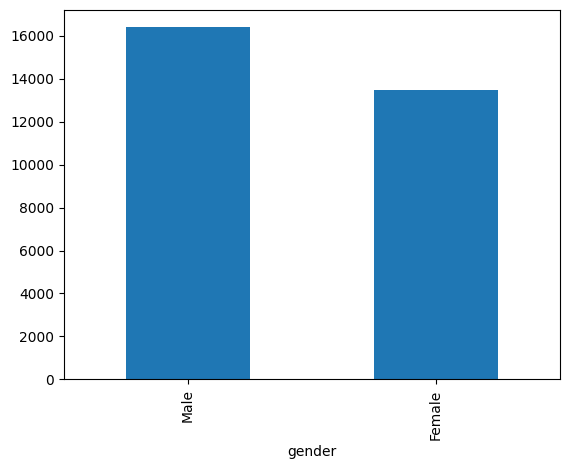

In [201]:
df2['gender'].value_counts().plot(kind='bar')

In [202]:
len(categorical_columns)

9

In [203]:
pct_cnt = df2['gender'].value_counts()
pct_cnt.values

array([16376, 13446])

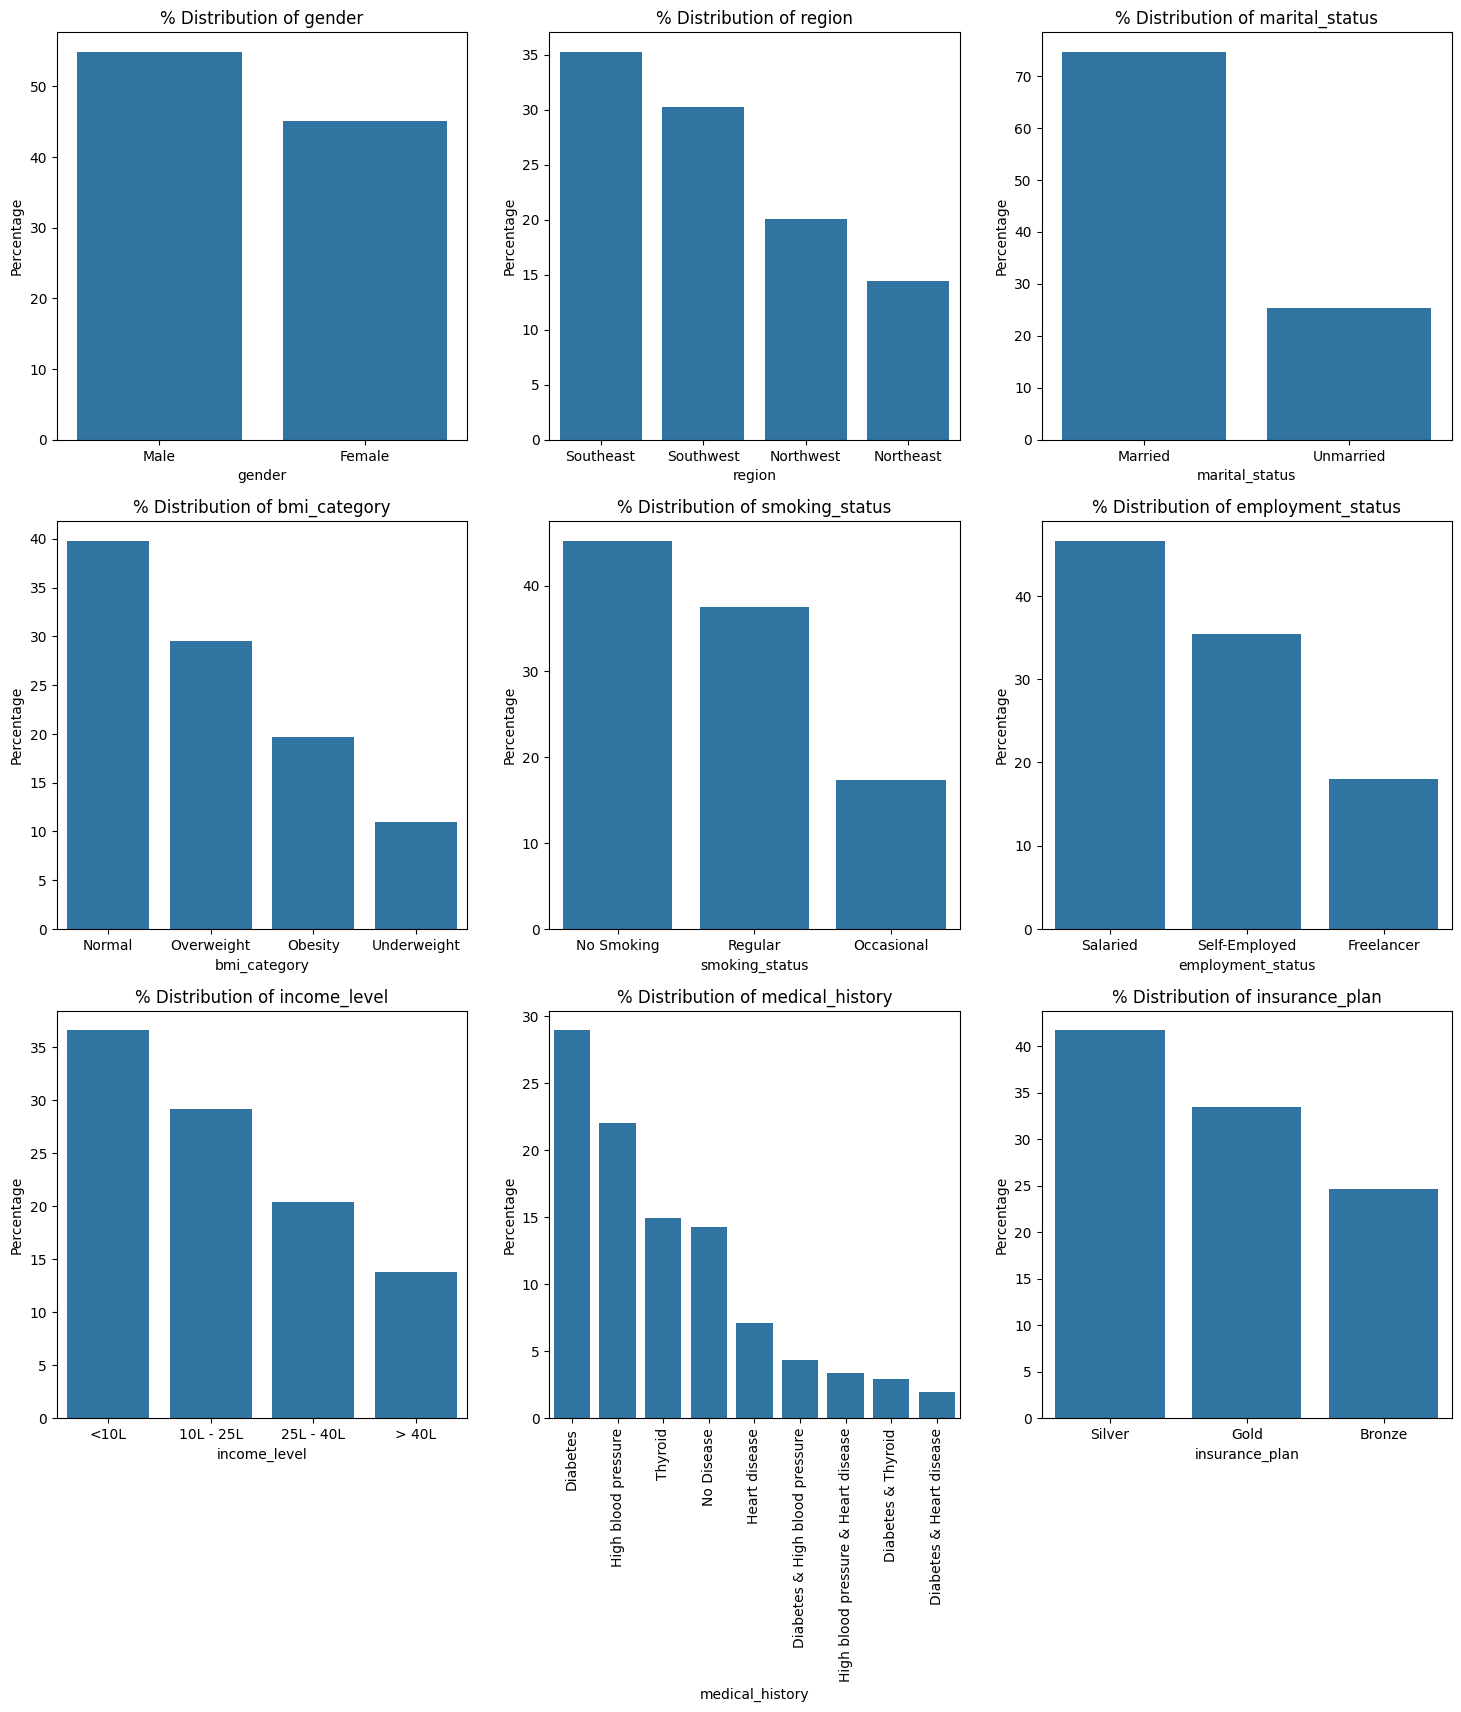

In [204]:
fig,axes = plt.subplots(3,3,figsize=(18,18))
axes = axes.flatten() #flatten 2d array (must use this)

for ax,columns in zip(axes,categorical_columns):
    categ_counts = df2[columns].value_counts(normalize=True)*100
    sns.barplot(x=categ_counts.index,y=categ_counts.values,ax=ax)
    ax.set_title(f'% Distribution of {columns}')
    ax.set_ylabel('Percentage')
    if columns=='medical_history':
        ax.tick_params(axis='x', labelrotation=90)


### Bivariate Analysis

In [205]:
crosstab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,214,3287,618


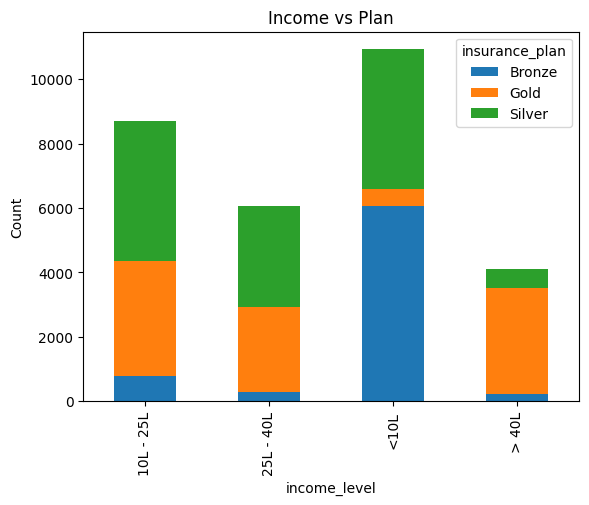

In [206]:
crosstab.plot(kind='bar',stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

In [207]:
# anlayzing using heatmap for better understanding

<Axes: xlabel='insurance_plan', ylabel='income_level'>

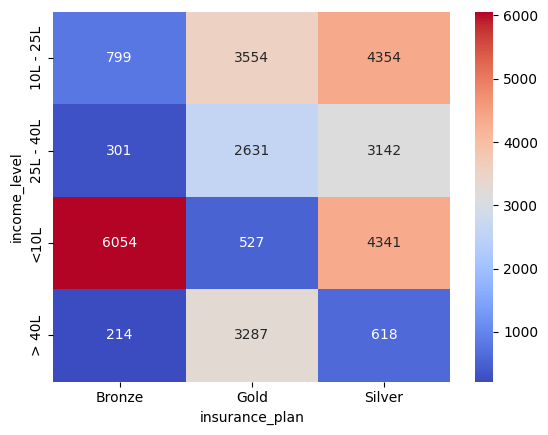

In [208]:
sns.heatmap(crosstab,annot=True,cmap='coolwarm',fmt='d')

## Feature Engineering

In [209]:
df2.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0


In [210]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [211]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

/var/folders/kg/11tps70n3wb66s6pg8w0z5bc0000gn/T/ipykernel_7758/746615070.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
/var/folders/kg/11tps70n3wb66s6pg8w0z5bc0000gn/T/ipykernel_7758/746615070.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [212]:
# Normalizing risk_score
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()

df2['normalized_risk_score'] = (df2['total_risk_score']-min_score)/(max_score-min_score)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,none,6,0.428571


## Encoding Text Columns

### Label encoding : Odinal data

In [213]:
df2['insurance_plan'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [214]:
df2['insurance_plan'] =df2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})

In [215]:
df2['income_level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [216]:
df2['income_level']= df2['income_level'].map({'<10L':1,'10L - 25L':2,'25L - 40L':3,'> 40L':4,})

### One hot encoding : Nominal Data

In [217]:
df2.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,0,diabetes,none,6,0.428571


In [218]:
nominal_col = ['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2,columns=nominal_col,drop_first=True,dtype=int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29822 entries, 0 to 29903
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              29822 non-null  int64  
 1   number_of_dependants             29822 non-null  int64  
 2   income_level                     29822 non-null  int64  
 3   income_lakhs                     29822 non-null  int64  
 4   medical_history                  29822 non-null  object 
 5   insurance_plan                   29822 non-null  int64  
 6   annual_premium_amount            29822 non-null  int64  
 7   genetical_risk                   29822 non-null  int64  
 8   disease1                         29822 non-null  object 
 9   disease2                         29822 non-null  object 
 10  total_risk_score                 29822 non-null  int64  
 11  normalized_risk_score            29822 non-null  float64
 12  gender_Male            

In [219]:
df3.head(1)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0


In [220]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head(1)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0


## Calculate VIF Multicolinearity

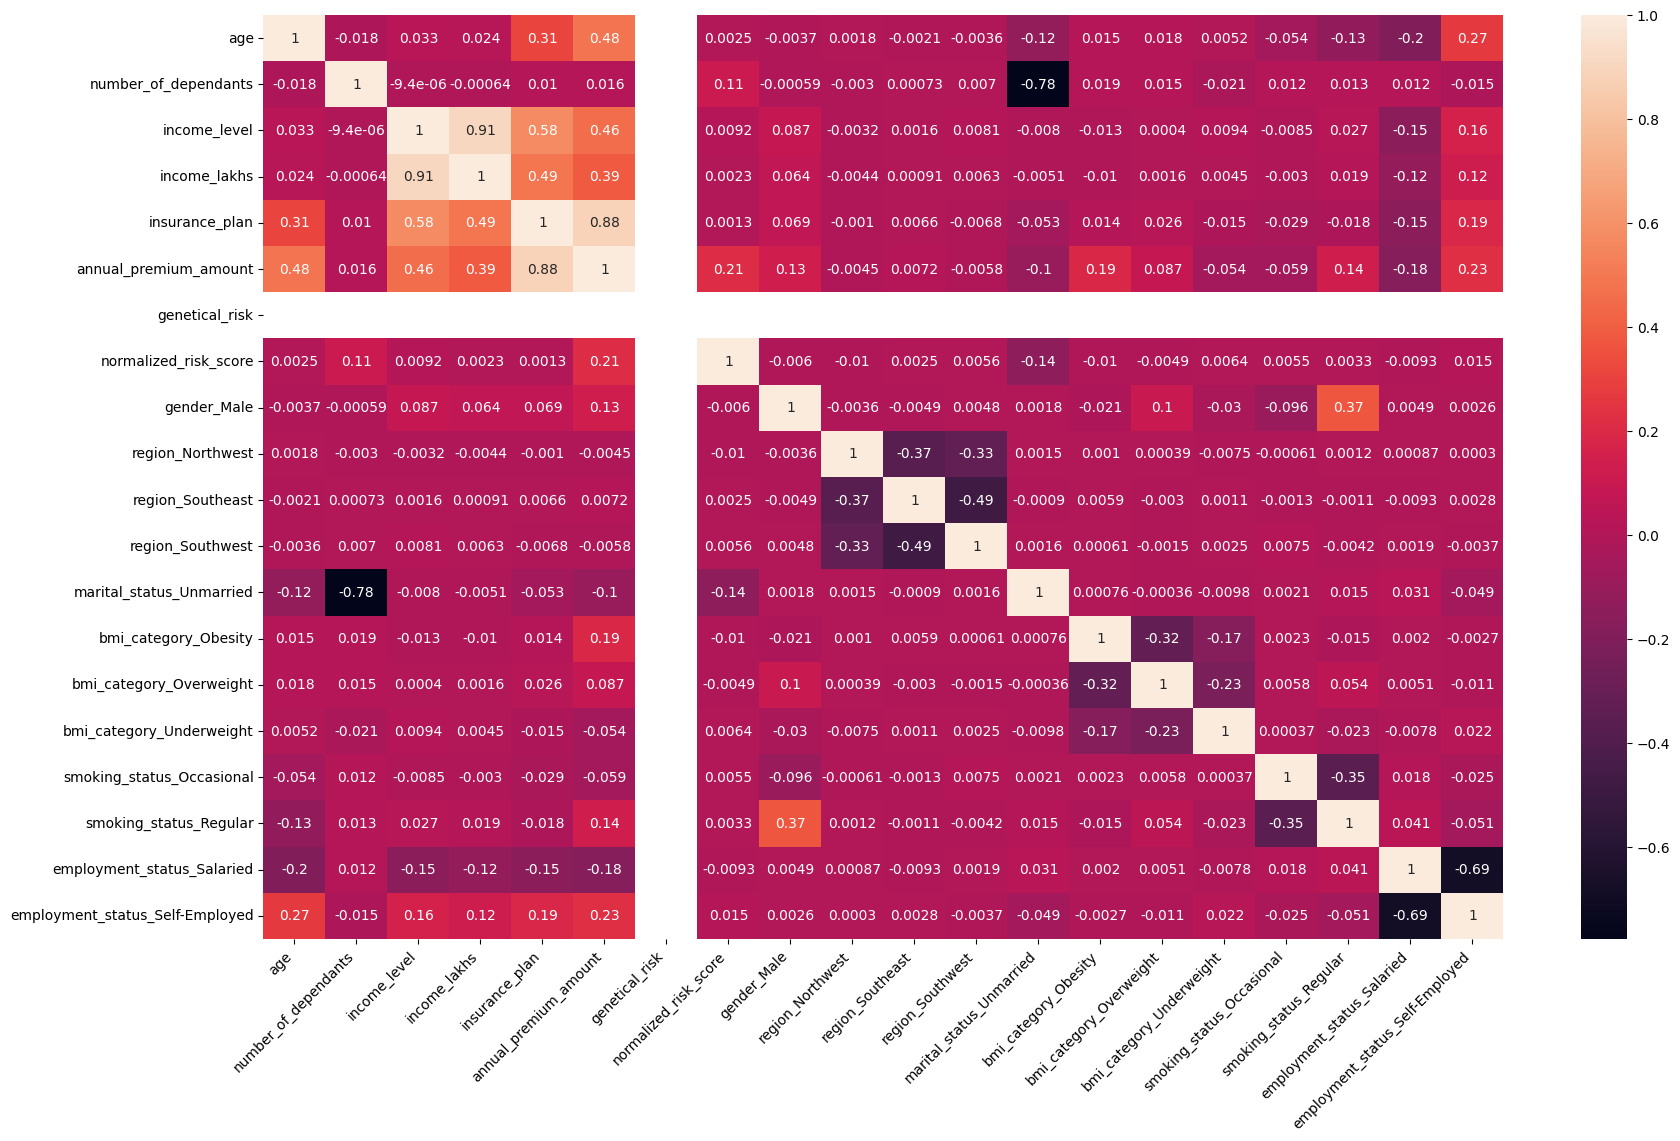

In [221]:
cm = df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.show()

In [222]:
X = df4.drop('annual_premium_amount',axis=1)
y = df4['annual_premium_amount']

col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X.describe()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [223]:
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.000000,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.000000,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.333333,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,1.000000,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.333333,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [224]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Columns'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

calc_vif(X)    

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Columns,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,genetical_risk,NaN
6,normalized_risk_score,3.810619
7,gender_Male,2.599098
8,region_Northwest,2.123965
9,region_Southeast,2.980842


In [225]:
calc_vif(X.drop('income_level',axis=1))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Columns,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,genetical_risk,NaN
5,normalized_risk_score,3.808345
6,gender_Male,2.591439
7,region_Northwest,2.123277
8,region_Southeast,2.979899
9,region_Southwest,2.708641


In [226]:
X_reduced = X.drop('income_level',axis=1)
X_reduced.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.0,0.0,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0


## Model Training

In [227]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


In [228]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=0.30,random_state=10)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_train',y_test.shape)

X_train (20875, 18)
X_test (8947, 18)
y_train (20875,)
y_train (8947,)


### Linear Regreassion Moldel

In [229]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
train_score_lr = model_lr.score(X_train,y_train)
test_score_lr = model_lr.score(X_test,y_test)
train_score_lr,test_score_lr

(0.9534163989489616, 0.9538448451629948)

In [230]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
mse_lr,rmse_lr


(2183844.3603124563, np.float64(1477.7835972538253))

In [231]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([ 7016.239328, -1311.764702,  -708.193369, 14835.988208,
          -0.      ,  6053.624123,    37.558269,   -55.250872,
         -19.622543,   -22.289676,  -700.3202  ,  3926.812706,
        1979.456047,   612.866236,   837.395101,  2800.661843,
         -45.491367,   243.078421])

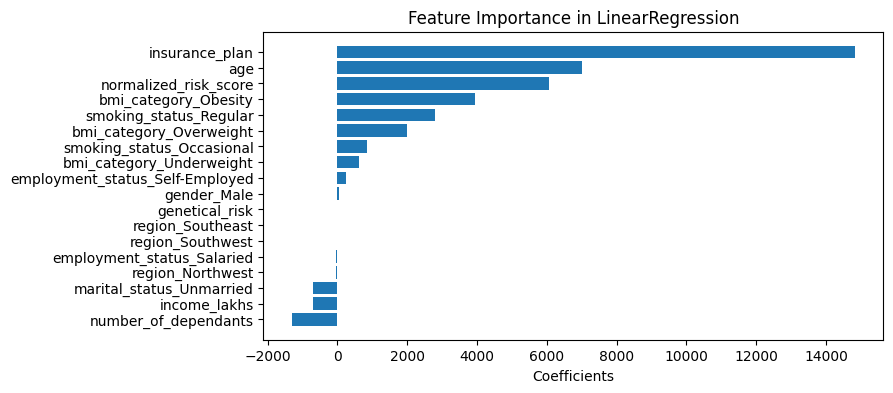

In [232]:
feature_importance = model_lr.coef_
coef_df = pd.DataFrame(feature_importance,X_test.columns,columns=['Coefficients'])  #(col_arr_items,index_items,col_name)
coef_df = coef_df.sort_values(by='Coefficients',ascending=True)

plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'])
plt.title('Feature Importance in LinearRegression')
plt.xlabel('Coefficients')
plt.show()

### Ridge Regression Model

In [233]:
model_rg = Ridge(alpha=1)
model_rg.fit(X_train,y_train)
train_score_rg = model_rg.score(X_train,y_train)
test_score_rg = model_rg.score(X_test,y_test)
train_score_rg,test_score_rg


(0.9534162332209687, 0.9538456995663842)

In [234]:
y_pred = model_rg.predict(X_test)
mse_rg = mean_squared_error(y_test,y_pred)
rmse_rg = np.sqrt(mse_rg)
mse_rg,rmse_rg

(2183803.9339715657, np.float64(1477.7699191591246))

### XGBoost Model

In [235]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.9948463439941406

In [236]:
y_pred = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test,y_pred)
rmse_xgb = np.sqrt(mse_xgb)
mse_xgb, rmse_xgb

(243847.734375, np.float64(493.80941098261786))

In [237]:
model_xgb = XGBRegressor()

parameter_grid = {
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth': [3,4,5]
}

random_search = RandomizedSearchCV(model_xgb,parameter_grid,n_iter=10,cv=3,scoring='r2',random_state=42,n_jobs=-1)
random_search.fit(X_train,y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 4, ...], 'n_estimators': [20, 40, ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [238]:
random_search.best_score_

np.float64(0.9970577955245972)

In [239]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [240]:
best_model = random_search.best_estimator_

In [241]:
feature_importance = best_model.feature_importances_
feature_importance

array([0.029575, 0.000004, 0.000011, 0.898358, 0.      , 0.018415,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.018601,
       0.011639, 0.001889, 0.004074, 0.017418, 0.000016, 0.      ],
      dtype=float32)

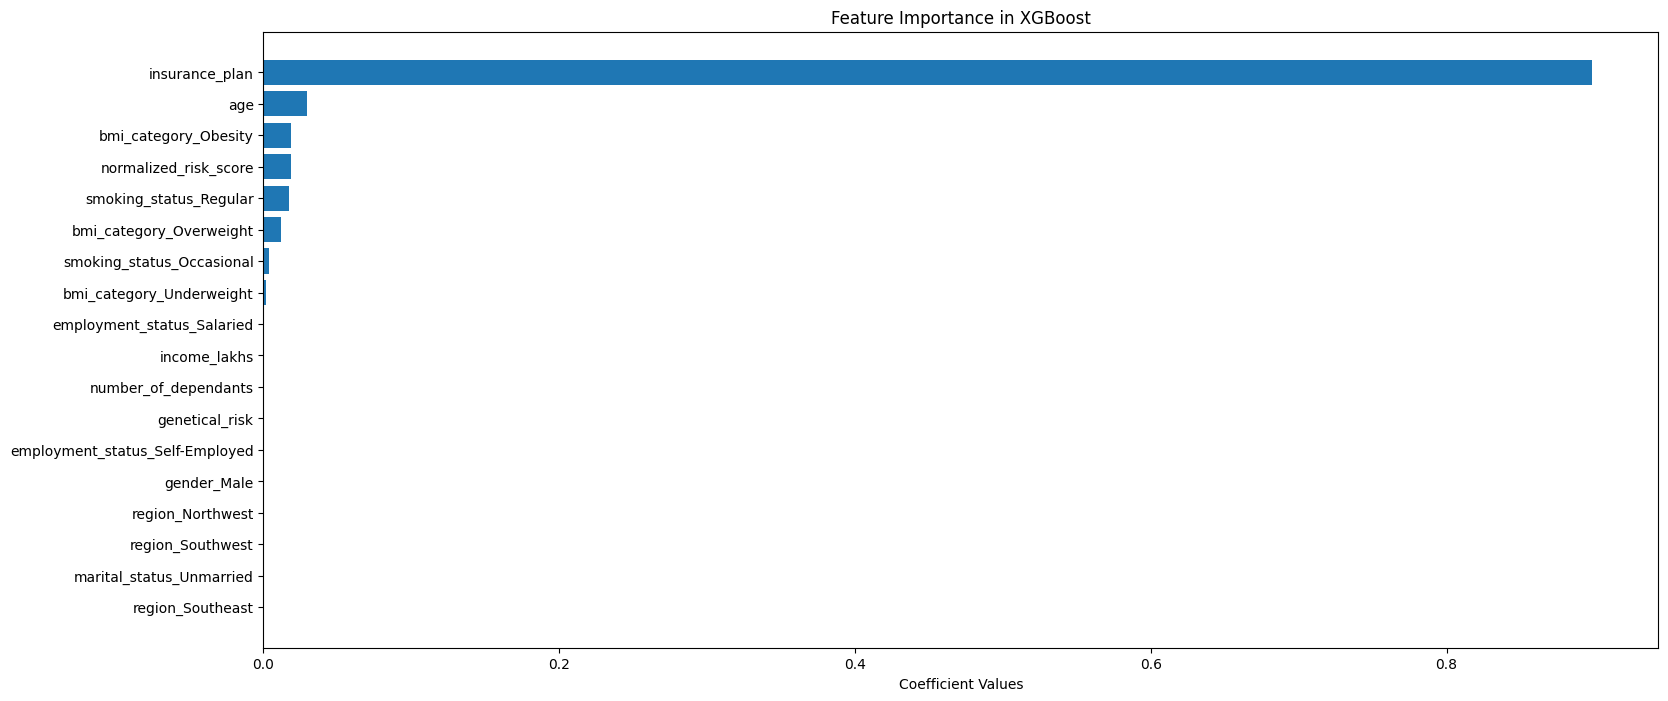

In [242]:
coef_df = pd.DataFrame(feature_importance,X_train.columns,columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients',ascending=True)

plt.figure(figsize=(18,8))
plt.barh(coef_df.index,coef_df['Coefficients'])
plt.title('Feature Importance in XGBoost')
plt.xlabel('Coefficient Values')
plt.show()

## Checking Margin of Error in our best traiend model

In [243]:
y_pred = best_model.predict(X_test)
residual = y_pred-y_test
residual_pct = (residual/y_test)*100

result_df = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred,
    'diff':residual,
    'diff_pct':residual_pct
})

result_df.head()

,actual,predicted,diff,diff_pct
19713,26895,26691.470703,-203.529297,-0.756755
14750,22734,22650.751953,-83.248047,-0.366183
19932,21198,21581.894531,383.894531,1.810994
29643,9100,9425.934570,325.934570,3.581699
17076,26434,26691.470703,257.470703,0.974013


In [244]:
extreme_error_threshold = 10
total_extreme_result_df = result_df[abs(result_df['diff_pct'])>extreme_error_threshold]
total_extreme_result = result_df[abs(result_df['diff_pct'])>extreme_error_threshold].shape[0]
total_test_record = X_test.shape[0]
error_pct = (total_extreme_result/total_test_record)*100
error_pct

0.32413099362914943

* We have now 3% extreme errors which means for 3% customers we will either overcharge or undercharge by 10% or more

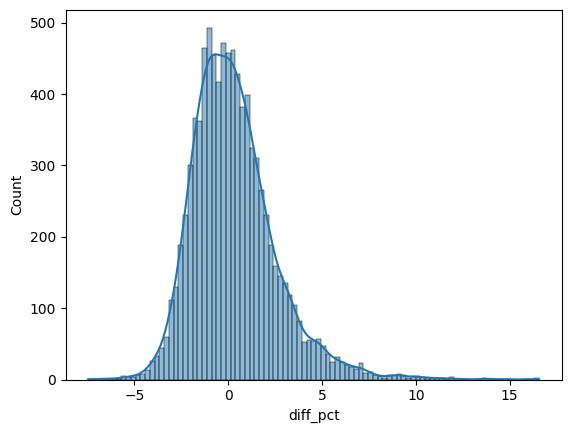

In [245]:
sns.histplot(result_df['diff_pct'],kde=True)
plt.show()

In [246]:
result_df[abs(result_df.diff_pct)>50].sort_values(by='diff_pct',ascending=False)

,actual,predicted,diff,diff_pct


* There will be now no customers whom we will overcharge or underchage by more than 50%

In [247]:
## Exporting Model

In [249]:
from joblib import dump

dump(best_model,'artifacts/model_rest.joblib')

scaler_with_cols = {
    'scaler':scaler,
    'cols_to_scale': col_to_scale
}
dump(scaler_with_cols,'artifacts/scaler_rest.joblib')

['artifacts/scaler_rest.joblib']